In [5]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [6]:
# read in CSV data
df = pd.read_csv('C:/Users/sweir/OneDrive/Desktop/Analysis Projects/Crude_Oil_Price_Projection/ML Resources/Cleaned_Crude_Oil_Dataset.csv')
df.head()

,Date,U.S. Field Production of Crude Oil (1k Bar.),Product Supplied of Crude Oil and Petroleum Products (1k Bar.),Gross Inputs to Refineries (1k Bar./Day),Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day),Operating Crude Oil Distillation Capacity (1k Bar./Day),Idle Crude Oil Distillation Capacity (1k Bar./Day),Percent Utilization of Refinery Operable Capacity,"Cushing, OK Crude Oil Future Contract ($/Bar.)","Cushing, OK WTI Spot Price FOB ($/Bar.)"
0,1/1/1986,283248,498728,12583,15459,14639,820,81.4,23.0,22.9
1,2/1/1986,256855,453209,12068,15485,14538,947,77.9,15.5,15.5
2,3/1/1986,279413,504565,11759,15485,14517,968,75.9,12.6,12.6
3,4/1/1986,265917,478339,12603,15473,14550,923,81.5,12.8,12.8
4,5/1/1986,273964,495789,13314,15484,14805,679,86.0,15.3,15.4


In [7]:
# to convert the date column to type DATETIME
df['Date'] = pd.to_datetime(df['Date'])
df.tail()

,Date,U.S. Field Production of Crude Oil (1k Bar.),Product Supplied of Crude Oil and Petroleum Products (1k Bar.),Gross Inputs to Refineries (1k Bar./Day),Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day),Operating Crude Oil Distillation Capacity (1k Bar./Day),Idle Crude Oil Distillation Capacity (1k Bar./Day),Percent Utilization of Refinery Operable Capacity,"Cushing, OK Crude Oil Future Contract ($/Bar.)","Cushing, OK WTI Spot Price FOB ($/Bar.)"
425,2021-06-01,338645,616115,16743,18128,17910,218,92.4,71.4,71.4
426,2021-07-01,351228,616714,16482,18129,17943,187,90.9,72.4,72.5
427,2021-08-01,347393,635828,16377,18130,17914,216,90.3,67.7,67.7
428,2021-09-01,324654,606706,15797,18130,15800,2331,87.1,71.5,71.6
429,2021-10-01,355670,616639,15581,18132,17133,999,85.9,81.2,81.5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 10 columns):
 #   Column                                                           Non-Null Count  Dtype         
---  ------                                                           --------------  -----         
 0   Date                                                             430 non-null    datetime64[ns]
 1   U.S. Field Production of Crude Oil (1k Bar.)                     430 non-null    int64         
 2   Product Supplied of Crude Oil and Petroleum Products (1k Bar.)   430 non-null    int64         
 3   Gross Inputs to Refineries (1k Bar./Day)                         430 non-null    int64         
 4   Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day)  430 non-null    int64         
 5   Operating Crude Oil Distillation Capacity (1k Bar./Day)          430 non-null    int64         
 6   Idle Crude Oil Distillation Capacity (1k Bar./Day)               430 non-null    i

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

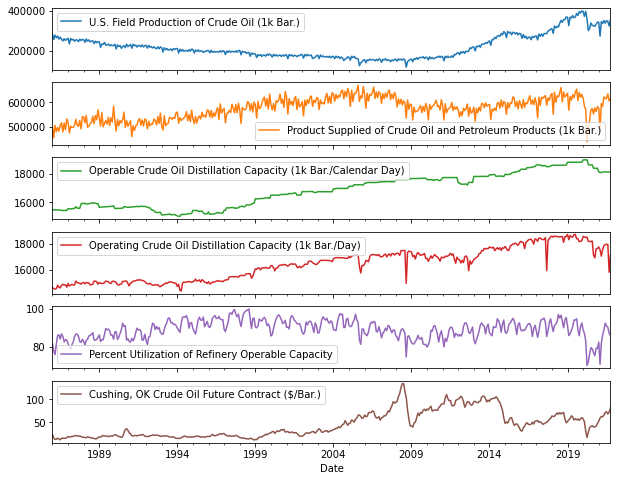

In [10]:
df.set_index('Date')[['U.S. Field Production of Crude Oil (1k Bar.)', 'Product Supplied of Crude Oil and Petroleum Products (1k Bar.)', 'Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day)', 'Operating Crude Oil Distillation Capacity (1k Bar./Day)', 'Percent Utilization of Refinery Operable Capacity', 'Cushing, OK Crude Oil Future Contract ($/Bar.)']].plot(subplots=True)

In [11]:
# creating input DataFrame (Cushing, OK Crude Oil Future Contract ($/Bar.) is our Dependent Variable)
df_input=df[['U.S. Field Production of Crude Oil (1k Bar.)', 'Product Supplied of Crude Oil and Petroleum Products (1k Bar.)', 'Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day)', 'Operating Crude Oil Distillation Capacity (1k Bar./Day)', 'Percent Utilization of Refinery Operable Capacity', 'Cushing, OK Crude Oil Future Contract ($/Bar.)']]
df_input

,U.S. Field Production of Crude Oil (1k Bar.),Product Supplied of Crude Oil and Petroleum Products (1k Bar.),Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day),Operating Crude Oil Distillation Capacity (1k Bar./Day),Percent Utilization of Refinery Operable Capacity,"Cushing, OK Crude Oil Future Contract ($/Bar.)"
0,283248,498728,15459,14639,81.4,23.0
1,256855,453209,15485,14538,77.9,15.5
2,279413,504565,15485,14517,75.9,12.6
3,265917,478339,15473,14550,81.5,12.8
4,273964,495789,15484,14805,86.0,15.3
...,...,...,...,...,...,...
425,338645,616115,18128,17910,92.4,71.4
426,351228,616714,18129,17943,90.9,72.4
427,347393,635828,18130,17914,90.3,67.7
428,324654,606706,18130,15800,87.1,71.5


In [12]:
df_input.describe()

,U.S. Field Production of Crude Oil (1k Bar.),Product Supplied of Crude Oil and Petroleum Products (1k Bar.),Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day),Operating Crude Oil Distillation Capacity (1k Bar./Day),Percent Utilization of Refinery Operable Capacity,"Cushing, OK Crude Oil Future Contract ($/Bar.)"
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,220299.755814,574218.216279,16841.562791,16419.065116,89.159767,44.572326
std,59441.362987,45528.327895,1161.536555,1210.491590,4.918490,28.698790
min,119208.000000,436455.000000,15028.000000,14375.000000,70.200000,11.300000
25%,173878.250000,537078.500000,15686.250000,15117.000000,86.000000,19.900000
50%,202056.500000,579533.000000,16764.000000,16564.000000,89.500000,33.050000
75%,255772.250000,610163.500000,17736.000000,17227.500000,92.700000,63.500000
max,400219.000000,671648.000000,18976.000000,18698.000000,99.900000,134.000000


In [13]:
scaler = MinMaxScaler()
df_input_scaled = scaler.fit_transform(df_input)

In [14]:
df_input_scaled

array([[0.58374939, 0.26477404, 0.1091692 , 0.0610687 , 0.37710438,
        0.09535452],
       [0.4898278 , 0.07123511, 0.11575481, 0.0377053 , 0.25925926,
        0.03422983],
       [0.57010224, 0.28959195, 0.11575481, 0.03284756, 0.19191919,
        0.01059495],
       ...,
       [0.81201448, 0.84769955, 0.78571429, 0.81864446, 0.67676768,
        0.4596577 ],
       [0.73109594, 0.72387784, 0.78571429, 0.3296322 , 0.56902357,
        0.49062755],
       [0.84146884, 0.76611124, 0.78622087, 0.63798288, 0.52861953,
        0.56968215]])

In [16]:
features=df_input_scaled
target=df_input_scaled[:,5]

In [18]:
TimeseriesGenerator(features, target, length=12, sampling_rate=1, batch_size=3)[5]

(array([[[0.48303091, 0.25192501, 0.13601824, 0.11450382, 0.37037037,
          0.0594947 ],
         [0.49541833, 0.25660202, 0.13601824, 0.10386306, 0.41414141,
          0.06519967],
         [0.45958343, 0.2909823 , 0.14184397, 0.10663891, 0.51178451,
          0.07090465],
         [0.48600944, 0.39987159, 0.17046606, 0.17279667, 0.55555556,
          0.08149959],
         [0.48147581, 0.29884393, 0.1443769 , 0.14781402, 0.55555556,
          0.07253464],
         [0.45177947, 0.27059479, 0.14311044, 0.14087439, 0.51515152,
          0.06682967],
         [0.49842889, 0.37721361, 0.14285714, 0.12953967, 0.42087542,
          0.07008965],
         [0.47224842, 0.22889712, 0.21783181, 0.12028684, 0.40740741,
          0.06112469],
         [0.49334724, 0.44361439, 0.2325228 , 0.14365024, 0.46127946,
          0.04889976],
         [0.48587066, 0.43804875, 0.22467072, 0.1487393 , 0.42424242,
          0.04808476],
         [0.43998278, 0.33407032, 0.23150963, 0.1265325 , 0.36026936,


In [19]:
#defining train_test_splits
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=123, shuffle = False)

In [20]:
x_train.shape

(344, 6)

In [21]:
x_test.shape

(86, 6)

In [22]:
#defining training and testing generators
window_length=36
batch_size=12
num_features=6
training_generator = TimeseriesGenerator(x_train, y_train, length=window_length, sampling_rate=1, batch_size=batch_size)
testing_generator = TimeseriesGenerator(x_test, y_test, length=window_length, sampling_rate=1, batch_size=batch_size)

In [23]:
training_generator[0]

(array([[[0.58374939, 0.26477404, 0.1091692 , 0.0610687 , 0.37710438,
          0.09535452],
         [0.4898278 , 0.07123511, 0.11575481, 0.0377053 , 0.25925926,
          0.03422983],
         [0.57010224, 0.28959195, 0.11575481, 0.03284756, 0.19191919,
          0.01059495],
         ...,
         [0.46082182, 0.46139553, 0.2325228 , 0.17164006, 0.44444444,
          0.0203749 ],
         [0.43233895, 0.3917421 , 0.22315096, 0.16331251, 0.46127946,
          0.02200489],
         [0.45187199, 0.56492753, 0.22568389, 0.11843627, 0.5016835 ,
          0.0407498 ]],
 
        [[0.4898278 , 0.07123511, 0.11575481, 0.0377053 , 0.25925926,
          0.03422983],
         [0.57010224, 0.28959195, 0.11575481, 0.03284756, 0.19191919,
          0.01059495],
         [0.52207565, 0.17808353, 0.1127153 , 0.04048115, 0.38047138,
          0.01222494],
         ...,
         [0.43233895, 0.3917421 , 0.22315096, 0.16331251, 0.46127946,
          0.02200489],
         [0.45187199, 0.56492753, 0.225

In [39]:
# creating the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape= (window_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(128, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 36, 128)           69120     
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 36, 128)           0         
                                                                 
 lstm_4 (LSTM)               (None, 36, 128)           131584    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 36, 128)           0         
                                                                 
 dropout_2 (Dropout)         (None, 36, 128)           0         
                                                                 
 lstm_5 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_3 (Dropout)         (None, 128)              

In [41]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                   patience=4,
                                                   mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit(training_generator, epochs=50,
                     validation_data=testing_generator,
                     shuffle=False,
                     callbacks=[early_stopping])

Epoch 1/50
26/26 [==============================] - 13s 164ms/step - loss: 0.0171 - mean_absolute_error: 0.0913 - val_loss: 0.3959 - val_mean_absolute_error: 0.6160
Epoch 2/50
26/26 [==============================] - 2s 88ms/step - loss: 0.0358 - mean_absolute_error: 0.1448 - val_loss: 0.2482 - val_mean_absolute_error: 0.4827
Epoch 3/50
26/26 [==============================] - 2s 95ms/step - loss: 0.0231 - mean_absolute_error: 0.1073 - val_loss: 0.1619 - val_mean_absolute_error: 0.3814
Epoch 4/50
26/26 [==============================] - 2s 74ms/step - loss: 0.0284 - mean_absolute_error: 0.1310 - val_loss: 0.0828 - val_mean_absolute_error: 0.2684
Epoch 5/50
26/26 [==============================] - 2s 96ms/step - loss: 0.0709 - mean_absolute_error: 0.2118 - val_loss: 0.1569 - val_mean_absolute_error: 0.3852
Epoch 6/50
26/26 [==============================] - 2s 75ms/step - loss: 0.0788 - mean_absolute_error: 0.2189 - val_loss: 0.0502 - val_mean_absolute_error: 0.2074
Epoch 7/50
26/26 [==

In [42]:
model.evaluate(testing_generator, verbose=0)

[0.021171482279896736, 0.12935343384742737]

In [43]:
predictions=model.predict(testing_generator)

In [44]:
predictions.shape[0]

50

In [45]:
predictions

array([[0.24044636],
       [0.2385247 ],
       [0.2368123 ],
       [0.23597884],
       [0.236231  ],
       [0.23733994],
       [0.2391699 ],
       [0.24220192],
       [0.24568886],
       [0.2493524 ],
       [0.25235784],
       [0.25507438],
       [0.25677538],
       [0.25716814],
       [0.2570103 ],
       [0.25598577],
       [0.25322264],
       [0.24955162],
       [0.24631867],
       [0.24460784],
       [0.24429014],
       [0.2447637 ],
       [0.24490002],
       [0.24494606],
       [0.24400848],
       [0.2422575 ],
       [0.24007162],
       [0.23813295],
       [0.23601416],
       [0.23402393],
       [0.2320286 ],
       [0.23026493],
       [0.22884673],
       [0.22968939],
       [0.23327088],
       [0.23922262],
       [0.24672598],
       [0.25386542],
       [0.26028332],
       [0.26637986],
       [0.2724832 ],
       [0.27757978],
       [0.2833622 ],
       [0.2896971 ],
       [0.29511753],
       [0.2996044 ],
       [0.3031762 ],
       [0.305

In [46]:
y_test

array([0.66585167, 0.59494703, 0.52567237, 0.39119804, 0.29339853,
       0.32110839, 0.29828851, 0.35289324, 0.39201304, 0.39527302,
       0.32273839, 0.25753871, 0.27872861, 0.28524857, 0.25753871,
       0.21189894, 0.16707416, 0.15729421, 0.21760391, 0.24286879,
       0.28932355, 0.30562347, 0.27302363, 0.27302363, 0.27628362,
       0.31458843, 0.28198859, 0.33333333, 0.33659332, 0.34392828,
       0.31295844, 0.32436838, 0.30317848, 0.27628362, 0.28850856,
       0.2999185 , 0.31458843, 0.32925835, 0.36837816, 0.3797881 ,
       0.42542787, 0.41483293, 0.4205379 , 0.44824776, 0.47758761,
       0.45639772, 0.48410758, 0.4604727 , 0.4792176 , 0.48492258,
       0.36919315, 0.30480848, 0.32844336, 0.35615322, 0.38223309,
       0.42868786, 0.40423798, 0.35370823, 0.37652812, 0.35452323,
       0.37245314, 0.34800326, 0.37326813, 0.39527302, 0.37652812,
       0.3194784 , 0.15566422, 0.04400978, 0.1401793 , 0.2200489 ,
       0.2404238 , 0.25346373, 0.23064385, 0.23064385, 0.24286

In [47]:
x_test

array([[0.54575444, 0.59378893, 0.71099291, 0.76405274, 0.72390572,
        0.66585167],
       [0.59778799, 0.74094042, 0.71504559, 0.71501272, 0.58922559,
        0.59494703],
       [0.5714545 , 0.6180286 , 0.70491388, 0.76266482, 0.73063973,
        0.52567237],
       [0.63083652, 0.71369046, 0.70491388, 0.75410594, 0.8047138 ,
        0.39119804],
       [0.61082306, 0.68456119, 0.74442756, 0.78487162, 0.59259259,
        0.29339853],
       [0.52278025, 0.48646856, 0.74012158, 0.75618783, 0.56902357,
        0.32110839],
       [0.63282932, 0.6945785 , 0.74012158, 0.71385612, 0.61616162,
        0.29828851],
       [0.6068339 , 0.60108932, 0.74316109, 0.7203331 , 0.73400673,
        0.35289324],
       [0.62088317, 0.69107499, 0.74316109, 0.79666898, 0.75084175,
        0.39201304],
       [0.57484938, 0.67576416, 0.76697062, 0.80916031, 0.79124579,
        0.39527302],
       [0.6177872 , 0.79605686, 0.77735562, 0.82974786, 0.83501684,
        0.32273839],
       [0.61379448, 0

In [52]:
x_test[:,1:][window_length:]

array([[0.64809327, 0.87841945, 0.35900995, 0.51178451, 0.31458843],
       [0.77656223, 0.87867275, 0.89659958, 0.61279461, 0.32925835],
       [0.73494109, 0.88069909, 0.92088827, 0.75420875, 0.36837816],
       [0.82247771, 0.89032421, 0.956743  , 0.82491582, 0.3797881 ],
       [0.85478734, 0.90425532, 0.96969697, 0.7003367 , 0.42542787],
       [0.48876029, 0.90425532, 0.95211659, 0.5993266 , 0.41483293],
       [0.87678205, 0.90425532, 0.96830904, 0.7037037 , 0.4205379 ],
       [0.70025894, 0.90425532, 0.96830904, 0.73400673, 0.44824776],
       [0.81351061, 0.90425532, 0.95813093, 0.77441077, 0.47758761],
       [0.79361631, 0.90425532, 0.95951885, 0.9023569 , 0.45639772],
       [0.86889491, 0.90425532, 0.95813093, 0.83838384, 0.48410758],
       [0.95914419, 0.9050152 , 0.95882489, 0.88888889, 0.4604727 ],
       [0.70609244, 0.9050152 , 0.96021282, 0.78451178, 0.4792176 ],
       [0.88397614, 0.90552178, 0.85935693, 0.66666667, 0.48492258],
       [0.79411802, 0.90552178, 0.

In [54]:
df_predictions2=pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][window_length:])],axis=1)

In [55]:
df_predictions2

,0,0,1,2,3,4
0,0.240446,0.648093,0.878419,0.359010,0.511785,0.314588
1,0.238525,0.776562,0.878673,0.896600,0.612795,0.329258
2,0.236812,0.734941,0.880699,0.920888,0.754209,0.368378
3,0.235979,0.822478,0.890324,0.956743,0.824916,0.379788
4,0.236231,0.854787,0.904255,0.969697,0.700337,0.425428
5,0.237340,0.488760,0.904255,0.952117,0.599327,0.414833
6,0.239170,0.876782,0.904255,0.968309,0.703704,0.420538
7,0.242202,0.700259,0.904255,0.968309,0.734007,0.448248
8,0.245689,0.813511,0.904255,0.958131,0.774411,0.477588
9,0.249352,0.793616,0.904255,0.959519,0.902357,0.456398


In [51]:
reverse_transformation=scaler.inverse_transform(df_predictions2)

ValueError: operands could not be broadcast together with shapes (50,2) (6,) (50,2) 

In [ ]:
reverse_transformation

In [ ]:
df_final=df_input[predictions.shape[0]*-1:]

In [ ]:
df_final.count()

In [ ]:
df_final['predicted_wti_futures_price']=reverse_transformation[:,5]

In [ ]:
df_final[['Cushing, OK Crude Oil Future Contract ($/Bar.)', 'predicted_wti_futures_price']].plot()